<a href="https://colab.research.google.com/github/towardsai/ai-tutor-rag-system/blob/main/notebooks/03-RAG_with_LlamaIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Packages and Setup Variables


In [14]:
# !pip install -q openai==1.107.0 google-genai==1.36.0 llama-index==0.14.0 llama-index-llms-google-genai==0.3.0 jedi==0.19.2

In [15]:
import os

# Set the following API Keys in the Python environment. Will be used later.
# os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"
# os.environ["GOOGLE_API_KEY"] = "<YOUR_API_KEY>"

# from google.colab import userdata

# os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
# os.environ["GOOGLE_API_KEY"] =  userdata.get('Google_api_key')

from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env.

True

# Load Dataset


## Download


The dataset includes several articles from the TowardsAI blog, which provide an in-depth explanation of the LLaMA2 model.


In [16]:
# !curl -o ./mini-dataset.csv https://raw.githubusercontent.com/AlaFalaki/tutorial_notebooks/main/data/mini-llama-articles.csv

## Read File


In [17]:
import csv

rows = []

# Load the CSV file
with open("./mini-llama-articles.csv", mode="r", encoding="utf-8") as file:
    csv_reader = csv.reader(file)

    for idx, row in enumerate(csv_reader):
        if idx == 0:
            continue
            # Skip header row
        rows.append(row)

# The number of characters in the dataset.
print("number of articles:", len(rows))

number of articles: 14


# Generate Embedding


In [18]:
from llama_index.core import Document

# Convert the texts to Document objects so the LlamaIndex framework can process them.
documents = [Document(text=row[1]) for row in rows]

In [19]:
documents[0]

Document(id_='64c7110c-6534-4f80-b80f-eb5e897b94aa', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='LLM Variants and Meta\'s Open Source Before shedding light on four major trends, I\'d share the latest Meta\'s Llama 2 and Code Llama. Meta\'s Llama 2 represents a sophisticated evolution in LLMs. This suite spans models pretrained and fine-tuned across a parameter spectrum of 7 billion to 70 billion. A specialized derivative, Llama 2-Chat, has been engineered explicitly for dialogue-centric applications. Benchmarking revealed Llama 2\'s superior performance over most extant open-source chat models. Human-centric evaluations, focusing on safety and utility metrics, positioned Llama 2-Chat as a potential contender against proprietary, closed-source counterparts. The development trajectory of Llama 2 empha

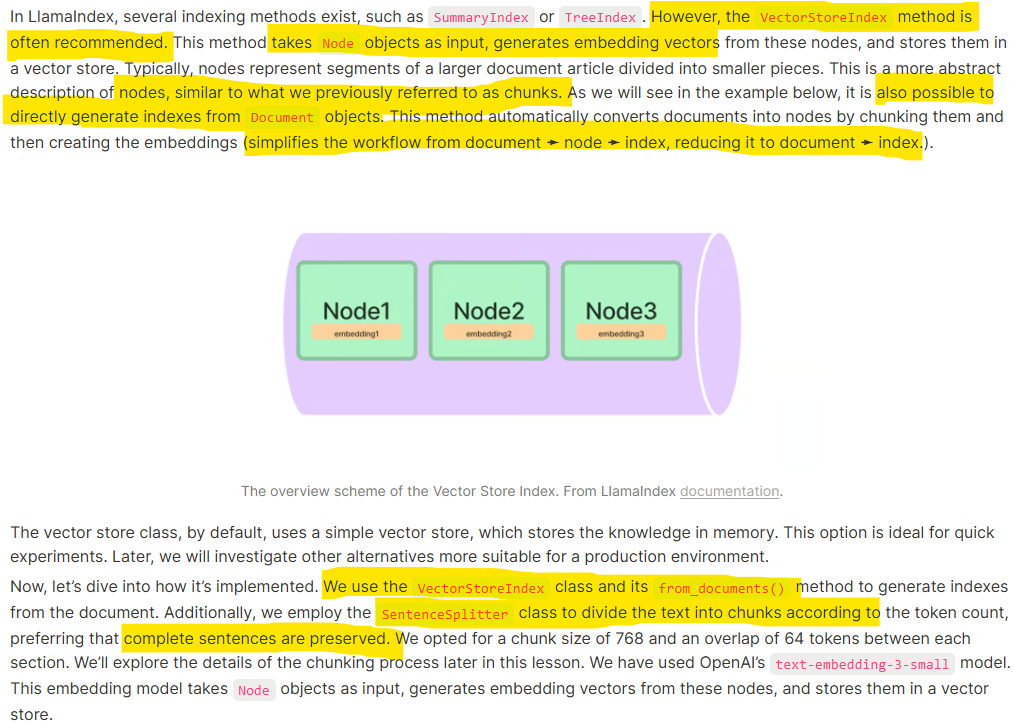

In [20]:
from llama_index.core import VectorStoreIndex
from llama_index.core.node_parser import SentenceSplitter
from llama_index.embeddings.openai import OpenAIEmbedding


# Build index / generate embeddings using OpenAI embedding model
index = VectorStoreIndex.from_documents(
    documents,
    transformations=[SentenceSplitter(chunk_size=768, chunk_overlap=64)],
    embed_model=OpenAIEmbedding(model="text-embedding-3-small"),
    show_progress=True,
)

Parsing nodes:   0%|          | 0/14 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/56 [00:00<?, ?it/s]

In [41]:
# Visualize Chunks and Chunks Overlap after the Sentence Splitter Transformation

chunk_docs = index.docstore.docs
for doc in chunk_docs.values():
  print(doc.text)
  print("-_-_-_-_-_-_-_-_")

LLM Variants and Meta's Open Source Before shedding light on four major trends, I'd share the latest Meta's Llama 2 and Code Llama. Meta's Llama 2 represents a sophisticated evolution in LLMs. This suite spans models pretrained and fine-tuned across a parameter spectrum of 7 billion to 70 billion. A specialized derivative, Llama 2-Chat, has been engineered explicitly for dialogue-centric applications. Benchmarking revealed Llama 2's superior performance over most extant open-source chat models. Human-centric evaluations, focusing on safety and utility metrics, positioned Llama 2-Chat as a potential contender against proprietary, closed-source counterparts. The development trajectory of Llama 2 emphasized rigorous fine-tuning methodologies. Meta's transparent delineation of these processes aims to catalyze community-driven advancements in LLMs, underscoring a commitment to collaborative and responsible AI development. Code Llama is built on top of Llama 2 and is available in three model

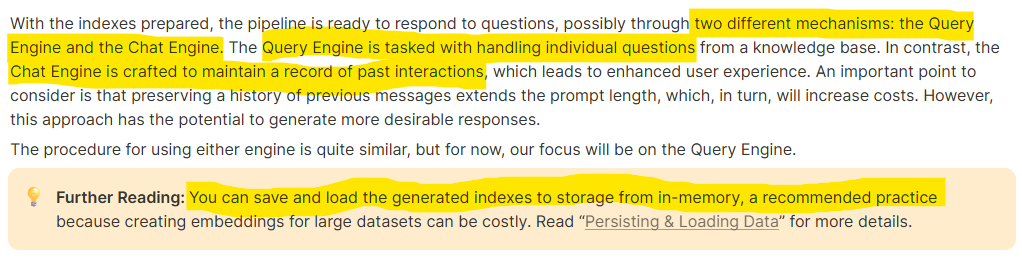

# Query Dataset


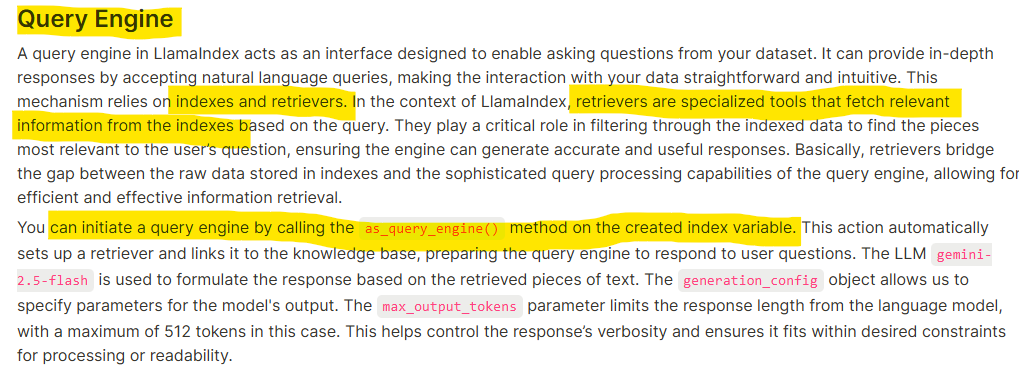

In [22]:
# # Define a query engine that is responsible for retrieving related pieces of text,
# # and using a LLM to formulate the final answer.

from llama_index.llms.openai import OpenAI
# from llama_index.llms.google_genai import GoogleGenAI
# import google.genai.types as types

# config = types.GenerateContentConfig(
#     thinking_config=types.ThinkingConfig(thinking_budget=0),
#     max_output_tokens=512,
#     temperature=1,
# )

# llm = GoogleGenAI(
#     model="gemini-2.5-flash",
#     generation_config=config,
#     )

llm = OpenAI(
    model="gpt-4o-mini",
    temperature=1,
    max_tokens=512,
)

query_engine = index.as_query_engine(llm=llm)

In [23]:
response = query_engine.query("How many parameters LLaMA 2 model has?")
print(response)

LLaMA 2 is available in four different model sizes: 7 billion, 13 billion, 34 billion, and 70 billion parameters.


In [24]:
response = query_engine.query("When will Llama 4 will be released?")
print(response)

The release date for Llama 4 has not been provided in the available information.


In [ ]:
# documents[0]

Document(id_='64c7110c-6534-4f80-b80f-eb5e897b94aa', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='LLM Variants and Meta\'s Open Source Before shedding light on four major trends, I\'d share the latest Meta\'s Llama 2 and Code Llama. Meta\'s Llama 2 represents a sophisticated evolution in LLMs. This suite spans models pretrained and fine-tuned across a parameter spectrum of 7 billion to 70 billion. A specialized derivative, Llama 2-Chat, has been engineered explicitly for dialogue-centric applications. Benchmarking revealed Llama 2\'s superior performance over most extant open-source chat models. Human-centric evaluations, focusing on safety and utility metrics, positioned Llama 2-Chat as a potential contender against proprietary, closed-source counterparts. The development trajectory of Llama 2 empha

In [42]:
documents[0]


Document(id_='64c7110c-6534-4f80-b80f-eb5e897b94aa', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='LLM Variants and Meta\'s Open Source Before shedding light on four major trends, I\'d share the latest Meta\'s Llama 2 and Code Llama. Meta\'s Llama 2 represents a sophisticated evolution in LLMs. This suite spans models pretrained and fine-tuned across a parameter spectrum of 7 billion to 70 billion. A specialized derivative, Llama 2-Chat, has been engineered explicitly for dialogue-centric applications. Benchmarking revealed Llama 2\'s superior performance over most extant open-source chat models. Human-centric evaluations, focusing on safety and utility metrics, positioned Llama 2-Chat as a potential contender against proprietary, closed-source counterparts. The development trajectory of Llama 2 empha

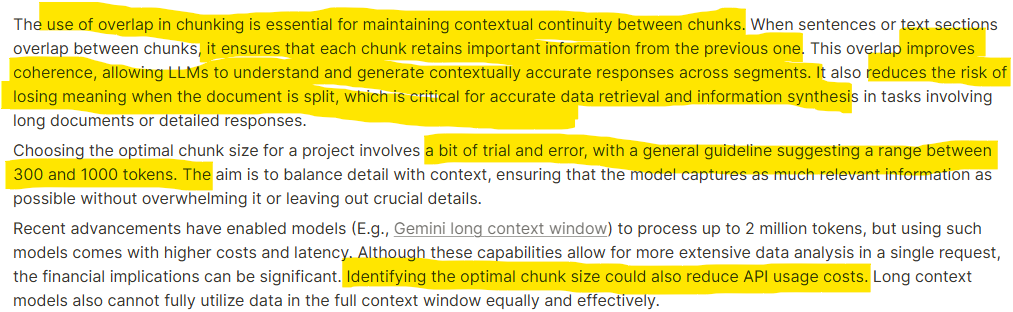

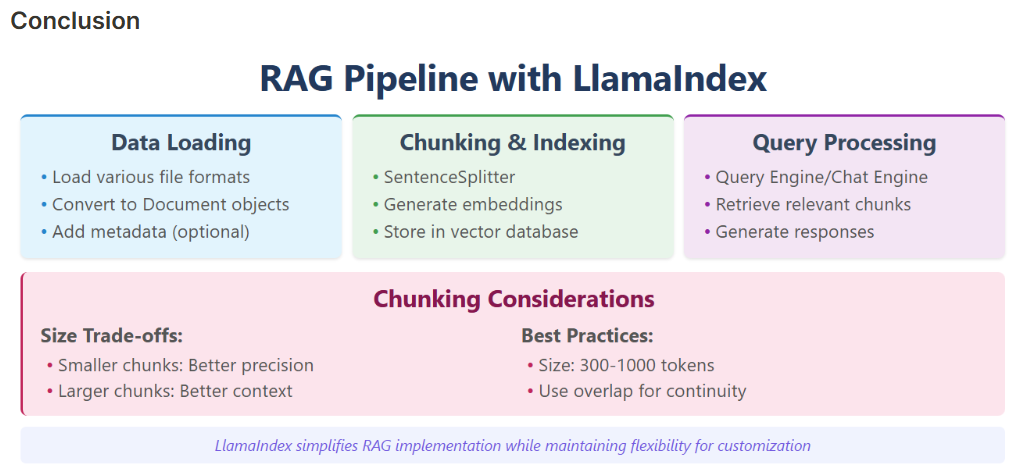